<a href="https://colab.research.google.com/github/rituraj6908/tuberculosis_prediction_montgomery/blob/main/Densenet_tuberculosisClassification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below


# importing all the necessary files
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from sklearn.metrics import accuracy_value, confusion_matrix, plot_confusion_matrix
from keras.applications.densenet import DenseNet121


# Densenet on Montgomery County Chest X-Ray Set

In [ ]:
# setting the data file path
dir_path = "C:/Users/mansi/Documents/Montgomery_County_chest_X-ray_set"
train_path = dir_path + "/train"
valid_path = dir_path + "/test"
IMAGE_SIZE = [224, 224]

In [ ]:
# preprocesing the train images and valid images

train_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(244, 244), classes=['normal', 'tuberculosis'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(244, 244), classes=['normal', 'tuberculosis'], batch_size=10)

# target_size downsize the image into 244*244 pixels
# classes represents the label
# batch_size means each batch of train data will contain 10 images

Found 98 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
# function to plot images in the form of a grid with 1 row and 10 columns to display all the images in a batch

def plotImages(images_batch):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_batch, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
def batchItem(batches):
  images, labels = next(train_batches)
  plotImages(images)
  print(f"Labels:\n {labels}")
  print(f"Class indices: {batches.class_indices}")

#label is one-hot encoded i.e there will be two column (as there is two classes only) in labels. 
# So, 1st column (0 index) will represent normal and 2nd column (1 index) will represnt tuberculosis.
# if the 1st column = 1 and 2nd column = 0, then the image is labeled as normal.
# if the 1st column = 0 and 2nd column = 1, then the image is labeled as tuberculosis.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

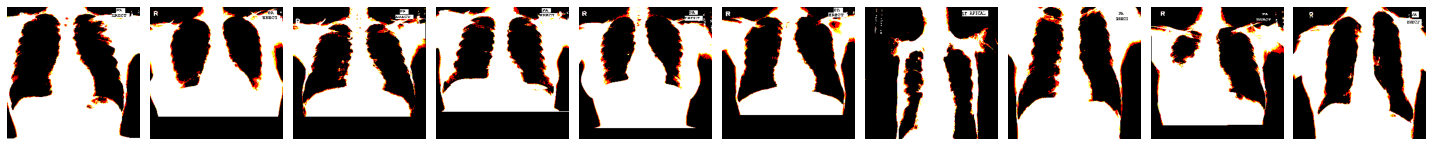

Labels:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Class indices: {'normal': 0, 'tuberculosis': 1}


In [ ]:
batchItem(train_batches)

In [ ]:

dense = DenseNet121(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')

x = Flatten()(dense.output)


prediction = Dense(units=2, activation="sigmoid")(x)
model = Model(inputs=dense.input, outputs=prediction)

model.summary()


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_18 (ZeroPadding2 (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_18[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=1)

Epoch 1/15
10/10 [==============================] - 134s 13s/step - loss: 0.6311 - accuracy: 0.6633 - val_loss: 0.8702 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 121s 12s/step - loss: 0.2857 - accuracy: 0.8776 - val_loss: 1.4801 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 119s 12s/step - loss: 0.1248 - accuracy: 0.9592 - val_loss: 1.7443 - val_accuracy: 0.5500
Epoch 4/15
10/10 [==============================] - 120s 12s/step - loss: 0.0267 - accuracy: 0.9898 - val_loss: 1.9165 - val_accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 117s 12s/step - loss: 0.0629 - accuracy: 0.9592 - val_loss: 0.2746 - val_accuracy: 0.8500
Epoch 6/15
10/10 [==============================] - 114s 11s/step - loss: 0.0218 - accuracy: 0.9898 - val_loss: 0.8582 - val_accuracy: 0.7000
Epoch 7/15
10/10 [==============================] - 115s 12s/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 1.4394 - val_accuracy: 0.7000
Epoch 

In [ ]:
# this functions plots accuracy vs val_accuracy over the 15 epochs
def plot_acc_vs_val_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracies')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

# this functions plots loss vs val_loss over the 15 epochs
def plot_loss_vs_val_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

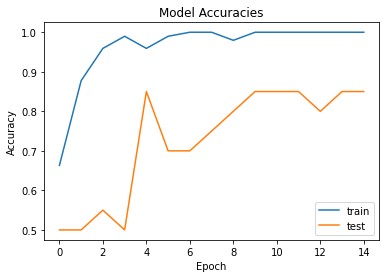

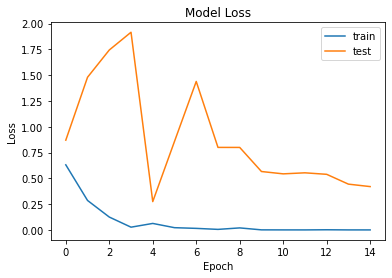

In [ ]:
plot_acc_vs_val_acc(history)
plot_loss_vs_val_loss(history)

# Densent on Shenzhen Chest X-Ray Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# setting the data file path
dir_path = "/content/drive/MyDrive/Shenzhen_chest_X-ray_set"
train_path = dir_path + "/train"
valid_path = dir_path + "/valid"
valid_path = dir_path + "/test"
IMAGE_SIZE = [420, 420]

In [ ]:
# preprocesing the train images and valid images

train_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(244, 244), classes=['normal', 'tuberculosis'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(244, 244), classes=['normal', 'tuberculosis'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(244, 244), classes=['normal', 'tuberculosis'], batch_size=10)

# target_size downsize the image into 244*244 pixels
# classes represents the label
# batch_size means each batch of train data will contain 10 images

Found 98 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
# function to plot images in the form of a grid with 1 row and 10 columns to display all the images in a batch

def plotImages(images_batch):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_batch, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
def batchItem(batches):
  images, labels = next(train_batches)
  plotImages(images)
  print(f"Labels:\n {labels}")
  print(f"Class indices: {batches.class_indices}")

#label is one-hot encoded i.e there will be two column (as there is two classes only) in labels. 
# So, 1st column (0 index) will represent normal and 2nd column (1 index) will represnt tuberculosis.
# if the 1st column = 1 and 2nd column = 0, then the image is labeled as normal.
# if the 1st column = 0 and 2nd column = 1, then the image is labeled as tuberculosis.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

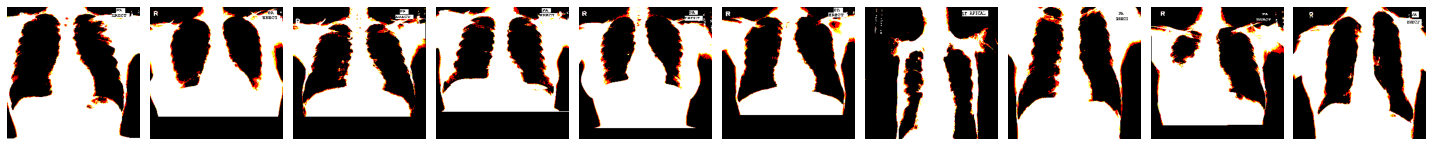

Labels:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Class indices: {'normal': 0, 'tuberculosis': 1}


In [ ]:
batchItem(train_batches)

In [ ]:

dense = DenseNet121(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')

x = Flatten()(dense.output)


prediction = Dense(units=2, activation="sigmoid")(x)
model = Model(inputs=dense.input, outputs=prediction)

model.summary()


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_18 (ZeroPadding2 (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_18[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=1)

Epoch 1/15
10/10 [==============================] - 134s 13s/step - loss: 0.6311 - accuracy: 0.6633 - val_loss: 0.8702 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 121s 12s/step - loss: 0.2857 - accuracy: 0.8776 - val_loss: 1.4801 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 119s 12s/step - loss: 0.1248 - accuracy: 0.9592 - val_loss: 1.7443 - val_accuracy: 0.5500
Epoch 4/15
10/10 [==============================] - 120s 12s/step - loss: 0.0267 - accuracy: 0.9898 - val_loss: 1.9165 - val_accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 117s 12s/step - loss: 0.0629 - accuracy: 0.9592 - val_loss: 0.2746 - val_accuracy: 0.8500
Epoch 6/15
10/10 [==============================] - 114s 11s/step - loss: 0.0218 - accuracy: 0.9898 - val_loss: 0.8582 - val_accuracy: 0.7000
Epoch 7/15
10/10 [==============================] - 115s 12s/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 1.4394 - val_accuracy: 0.7000
Epoch 

In [ ]:
# this functions plots accuracy vs val_accuracy over the 15 epochs
def plot_acc_vs_val_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracies')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

# this functions plots loss vs val_loss over the 15 epochs
def plot_loss_vs_val_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

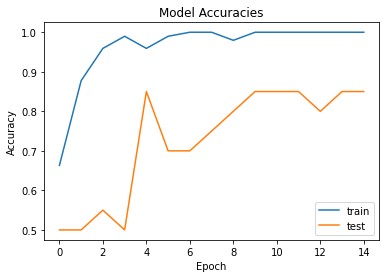

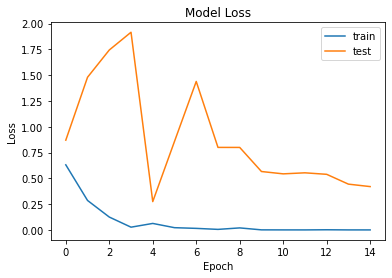

In [ ]:
plot_acc_vs_val_acc(history)
plot_loss_vs_val_loss(history)